In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import joblib
from output_paths import get_data_output_path, get_model_output_path, get_report_output_path, get_plot_output_path
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)

Matplotlib is building the font cache; this may take a moment.


pandas version: 2.3.3
numpy version: 2.0.2
matplotlib version: 3.9.4


# Explorasi Dataset

## Explorasi dfjadi

In [2]:
data_path_vle = "dataset/dfjadi-simplified - dfjadi-simplified.csv"
df_jadi = pd.read_csv(data_path_vle)
df_jadi.head()

,NIM,Nama,Jenis Kelamin,Prodi,Skor 1,Skor 2,Skor 3,Skor 4,Pemrosesan,Persepsi,Input,Pemahaman
0,22SA11A074,Mohamad Ridho Mubarok,Laki-laki,Informatika,-1,1,-3,-3,Reflektif Rendah,Sensing Rendah,Verbal Rendah,Global Rendah
1,22SA11A134,Maria Angelina Cahyani Candrakasih,Perempuan,Informatika,1,-3,-5,1,Aktif Rendah,Intuitif Rendah,Verbal Sedang,Sequential Rendah
2,22SA31A027,Tresnanda Agsifa Cakra Buana,Laki-laki,Teknologi Informasi,-5,5,1,1,Reflektif Sedang,Sensing Sedang,Visual Rendah,Sequential Rendah
3,22sa11a038,Ndaru Febrian Pujo Leksono,Laki-laki,Informatika,-1,1,-7,-3,Reflektif Rendah,Sensing Rendah,Verbal Sedang,Global Rendah
4,22SA11A035,Nurul Khotimah Ansyari,Perempuan,Informatika,-5,-1,-5,3,Reflektif Sedang,Intuitif Rendah,Verbal Sedang,Sequential Rendah


In [3]:
df_start_with_21 = df_jadi[df_jadi['NIM'].astype(str).str.startswith('21')]
# df_start_with_21.head()
df_start_with_21.NIM.count()

np.int64(15)

In [4]:
df_start_with_22 = df_jadi[df_jadi['NIM'].astype(str).str.startswith('22')]
# df_start_with_22.head()
df_start_with_22.NIM.count()

np.int64(150)

In [5]:
df_start_with_23 = df_jadi[df_jadi['NIM'].astype(str).str.startswith('23')]
# df_start_with_23.head()
df_start_with_23.NIM.count()

np.int64(252)

In [6]:
df_start_with_24 = df_jadi[df_jadi['NIM'].astype(str).str.startswith('24')]
# df_start_with_24.head()
df_start_with_24.NIM.count()

np.int64(146)

In [7]:
df_jadi.NIM.count()

np.int64(604)

In [8]:
df_jadi.NIM.count() - (df_start_with_21.NIM.count() + df_start_with_22.NIM.count() + df_start_with_23.NIM.count() + df_start_with_24.NIM.count())

np.int64(41)

In [9]:
df_merged_years = pd.concat([df_start_with_21, df_start_with_22, df_start_with_23, df_start_with_24])
# display(df_merged_years.head())
df_merged_years.NIM.count()

np.int64(563)

In [10]:
df_merged_years.head()

,NIM,Nama,Jenis Kelamin,Prodi,Skor 1,Skor 2,Skor 3,Skor 4,Pemrosesan,Persepsi,Input,Pemahaman
136,21SA1194,Rizky Aulia Rahman,Laki-laki,Informatika,-1,5,-5,-7,Reflektif Rendah,Sensing Sedang,Verbal Sedang,Global Sedang
168,21SA1086,Muhammad Thoriq Jamil,Laki-laki,Informatika,-3,7,-3,1,Reflektif Rendah,Sensing Sedang,Verbal Rendah,Sequential Rendah
171,21SA1158,Velizha Sandy Kusuma,Perempuan,Informatika,-3,-5,1,-3,Reflektif Rendah,Intuitif Sedang,Visual Rendah,Global Rendah
173,21SA1220,Aldona Septiana,Perempuan,Informatika,-5,-1,-1,-3,Reflektif Sedang,Intuitif Rendah,Verbal Rendah,Global Rendah
217,21SB1022,Refita Dwi Nurjanah,Perempuan,Bisnis Digital,1,-1,-5,-1,Aktif Rendah,Intuitif Rendah,Verbal Sedang,Global Rendah


In [11]:
df_merged_years['Pemrosesan'].isna().sum()

np.int64(0)

In [12]:
df_merged_years.to_csv(get_data_output_path("df_merged_years_output.csv", "processed"), index=False)

## Explorasi Mahasiswa Spend Time

In [13]:
data_path_vle = "dataset/rekap-001.csv"
df_rekap = pd.read_csv(data_path_vle)
df_rekap.head()

,NPM,NAMA,time_materials,time_tasks,time_forums,time_quizzes
0,MHS001,Mahasiswa Pertama,0,0,0,0
1,21SA1090,Bobit,0,0,5,0
2,MHSIF001,Mahasiswa IF 1,19636,1009,2959,0
3,MHSIF002,Mahasiswa IF 2,0,0,0,0
4,MHSIF003,Mahasiswa IF 3,0,0,0,0


In [14]:
df_rekap.NPM.count()

np.int64(456)

In [15]:
data_path_vle = "dataset/mhs_grouping_by_material_type.csv"
df_rekap_detail = pd.read_csv(data_path_vle)
df_rekap_detail.head()

,NPM,NAMA,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
0,MHS001,Mahasiswa Pertama,0,0,0,0,0,0
1,21SA1090,Bobit,0,0,0,0,5,0
2,MHSIF001,Mahasiswa IF 1,0,1100,18536,1009,2959,0
3,MHSIF002,Mahasiswa IF 2,0,0,0,0,0,0
4,MHSIF003,Mahasiswa IF 3,0,0,0,0,0,0


# Dataset

In [16]:
df_merged_years = df_jadi[["NIM", "Nama", "Pemrosesan", "Persepsi", "Input", "Pemahaman"]]

df_merged = pd.merge(
    df_merged_years,
    # df_rekap,
    df_rekap_detail,
    left_on="NIM",
    right_on="NPM",
    how="left"   # atau "inner" tergantung kebutuhan
)
df_merged.head()

,NIM,Nama,Pemrosesan,Persepsi,Input,Pemahaman,NPM,NAMA,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
0,22SA11A074,Mohamad Ridho Mubarok,Reflektif Rendah,Sensing Rendah,Verbal Rendah,Global Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22SA11A134,Maria Angelina Cahyani Candrakasih,Aktif Rendah,Intuitif Rendah,Verbal Sedang,Sequential Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22SA31A027,Tresnanda Agsifa Cakra Buana,Reflektif Sedang,Sensing Sedang,Visual Rendah,Sequential Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22sa11a038,Ndaru Febrian Pujo Leksono,Reflektif Rendah,Sensing Rendah,Verbal Sedang,Global Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22SA11A035,Nurul Khotimah Ansyari,Reflektif Sedang,Intuitif Rendah,Verbal Sedang,Sequential Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_merged.NPM.count()

np.int64(123)

In [18]:
df_merged['Pemrosesan'].isna().sum()

np.int64(0)

In [19]:
df_merged['Pemrosesan'].notna().sum()

np.int64(604)

In [20]:
df_merged.Pemrosesan.nunique()

5

In [21]:
df_merged.Pemrosesan.unique()

array(['Reflektif Rendah', 'Aktif Rendah', 'Reflektif Sedang',
       'Reflektif Kuat', 'Aktif Sedang'], dtype=object)

In [22]:
df_merged.Input.unique()

array(['Verbal Rendah', 'Verbal Sedang', 'Visual Rendah', 'Visual Sedang',
       'Verbal Kuat'], dtype=object)

In [23]:
df_merged.Input.nunique()

5

In [24]:
# Pemrosesan: Refrektif, Aktif
# Persepsi: Visual, Verbal

In [25]:
def map_pemrosesan(row):
    if (row['Pemrosesan'] == 'Reflektif Kuat') or (row['Pemrosesan'] == 'Reflektif Sedang') or (row['Pemrosesan'] == 'Reflektif Rendah'):
        return 'Reflektif'
    elif (row['Pemrosesan'] == 'Aktif Kuat') or (row['Pemrosesan'] == 'Aktif Sedang') or (row['Pemrosesan'] == 'Aktif Rendah'):
        return 'Aktif'
    else:
        return None

def map_input(row):
    if (row['Input'] == 'Visual Kuat') or (row['Input'] == 'Visual Sedang') or (row['Input'] == 'Visual Rendah'):
        return 'Visual'
    elif (row['Input'] == 'Verbal Kuat') or (row['Input'] == 'Verbal Sedang') or (row['Input'] == 'Verbal Rendah'):
        return 'Verbal'
    else:
        return None

# Tambahkan kolom baru
df_merged['Pemrosesan'] = df_merged.apply(map_pemrosesan, axis=1)
df_merged['Input'] = df_merged.apply(map_input, axis=1)


In [26]:
df_merged.head()

,NIM,Nama,Pemrosesan,Persepsi,Input,Pemahaman,NPM,NAMA,time_materials_video,time_materials_document,time_materials_article,time_tasks,time_forums,time_quizzes
0,22SA11A074,Mohamad Ridho Mubarok,Reflektif,Sensing Rendah,Verbal,Global Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22SA11A134,Maria Angelina Cahyani Candrakasih,Aktif,Intuitif Rendah,Verbal,Sequential Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22SA31A027,Tresnanda Agsifa Cakra Buana,Reflektif,Sensing Sedang,Visual,Sequential Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22sa11a038,Ndaru Febrian Pujo Leksono,Reflektif,Sensing Rendah,Verbal,Global Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22SA11A035,Nurul Khotimah Ansyari,Reflektif,Intuitif Rendah,Verbal,Sequential Rendah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# df_merged.to_csv("df_merged_output.csv", index=False)

In [28]:
df_merged.columns.tolist()

['NIM',
 'Nama',
 'Pemrosesan',
 'Persepsi',
 'Input',
 'Pemahaman',
 'NPM',
 'NAMA',
 'time_materials_video',
 'time_materials_document',
 'time_materials_article',
 'time_tasks',
 'time_forums',
 'time_quizzes']

In [29]:
df_merged_simplified = df_merged[[
    'NIM',
    'NAMA',
    'time_materials_video',
    'time_materials_document',
    'time_materials_article',
    'Pemrosesan',
    'Input',
    ]].copy()

In [30]:
df_merged_simplified.head()

,NIM,NAMA,time_materials_video,time_materials_document,time_materials_article,Pemrosesan,Input
0,22SA11A074,NaN,NaN,NaN,NaN,Reflektif,Verbal
1,22SA11A134,NaN,NaN,NaN,NaN,Aktif,Verbal
2,22SA31A027,NaN,NaN,NaN,NaN,Reflektif,Visual
3,22sa11a038,NaN,NaN,NaN,NaN,Reflektif,Verbal
4,22SA11A035,NaN,NaN,NaN,NaN,Reflektif,Verbal


In [31]:
df_merged_simplified['NAMA'].notna().sum()

np.int64(123)

In [32]:
df_merged_simplified_not_null =  df_merged_simplified[df_merged_simplified['NAMA'].notna()]
df_merged_simplified_not_null['NIM'].count()

np.int64(123)

In [33]:
df_merged_simplified_not_null.head()

,NIM,NAMA,time_materials_video,time_materials_document,time_materials_article,Pemrosesan,Input
16,23SA21A011,IWAN HARYATNO,22551.0,5683.0,21321.0,Aktif,Visual
24,23SA11A045,REFIDA SEPTIANA PUTRI,0.0,36562.0,0.0,Reflektif,Verbal
29,22SA11A027,WISNU PRATAMA AJI,0.0,0.0,0.0,Reflektif,Visual
31,22SA11A289,MAHMUDI,0.0,14060.0,0.0,Reflektif,Verbal
36,22SA11A097,ADITYA OKTA SAPUTRA,0.0,2071.0,0.0,Reflektif,Verbal


## One Hot Encoding

In [34]:
df_merged_simplified_not_null['labels'] = df_merged_simplified_not_null[['Pemrosesan', 'Input']].values.tolist()

/var/folders/4v/01q8gnvx6bl5dmy5dmb53tg40000gn/T/ipykernel_18435/1202623539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_simplified_not_null['labels'] = df_merged_simplified_not_null[['Pemrosesan', 'Input']].values.tolist()


In [35]:
df_merged_simplified_not_null.head()

,NIM,NAMA,time_materials_video,time_materials_document,time_materials_article,Pemrosesan,Input,labels
16,23SA21A011,IWAN HARYATNO,22551.0,5683.0,21321.0,Aktif,Visual,"[Aktif, Visual]"
24,23SA11A045,REFIDA SEPTIANA PUTRI,0.0,36562.0,0.0,Reflektif,Verbal,"[Reflektif, Verbal]"
29,22SA11A027,WISNU PRATAMA AJI,0.0,0.0,0.0,Reflektif,Visual,"[Reflektif, Visual]"
31,22SA11A289,MAHMUDI,0.0,14060.0,0.0,Reflektif,Verbal,"[Reflektif, Verbal]"
36,22SA11A097,ADITYA OKTA SAPUTRA,0.0,2071.0,0.0,Reflektif,Verbal,"[Reflektif, Verbal]"


In [36]:
df_merged_simplified_not_null = df_merged_simplified_not_null.drop(columns=['NIM', 'NAMA', 'Pemrosesan', 'Input'])
df_merged_simplified_not_null.head()

,time_materials_video,time_materials_document,time_materials_article,labels
16,22551.0,5683.0,21321.0,"[Aktif, Visual]"
24,0.0,36562.0,0.0,"[Reflektif, Verbal]"
29,0.0,0.0,0.0,"[Reflektif, Visual]"
31,0.0,14060.0,0.0,"[Reflektif, Verbal]"
36,0.0,2071.0,0.0,"[Reflektif, Verbal]"


In [37]:
df_merged_simplified_not_null.to_csv(get_data_output_path("cleaned_learning_styles_dataset.csv", "processed"), index=False)

In [38]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_merged_simplified_not_null["labels"])
X = df_merged_simplified_not_null.drop(columns=["labels"])

print("Label classes:", mlb.classes_)
print("Encoded labels:\n", y)

Label classes: ['Aktif' 'Reflektif' 'Verbal' 'Visual']
Encoded labels:
 [[1 0 0 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [1 0 0 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 

# Training

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_label_model = MultiOutputClassifier(base_model)
multi_label_model.fit(X_train, y_train)

y_pred = multi_label_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

# Save classification report to organized structure
import json
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(get_report_output_path("classification_report.csv", "classification_results"), index=True)
report_json = json.dumps(report, indent=2)
with open(get_report_output_path("classification_report.json", "classification_results"), 'w') as f:
    f.write(report_json)

              precision    recall  f1-score   support

       Aktif       0.50      0.20      0.29        10
   Reflektif       0.76      0.93      0.83        27
      Verbal       0.85      0.90      0.88        31
      Visual       0.25      0.17      0.20         6

   micro avg       0.76      0.76      0.76        74
   macro avg       0.59      0.55      0.55        74
weighted avg       0.72      0.76      0.73        74
 samples avg       0.76      0.76      0.76        74



# Save

In [41]:
# Simpan model
joblib.dump(multi_label_model, get_model_output_path("multi_label_model.pkl", "rf_classifier"))

# Simpan juga encoder label
joblib.dump(mlb, get_model_output_path("label_encoder.pkl", "rf_classifier"))

['outputs/models/rf_classifier/label_encoder.pkl']

# Load

In [42]:
# Load kembali model dan encoder
multi_label_model = joblib.load(get_model_output_path("multi_label_model.pkl", "rf_classifier"))
mlb = joblib.load(get_model_output_path("label_encoder.pkl", "rf_classifier"))

# Contoh input baru
X_new = [[22551.0, 5683.0, 21321.0]]

# Prediksi
y_pred = multi_label_model.predict(X_new)

# Konversi hasil kembali ke label asli
decoded_labels = mlb.inverse_transform(y_pred)
print(decoded_labels)

[('Reflektif', 'Verbal')]


/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, bu

In [43]:
# Load kembali model dan encoder
multi_label_model = joblib.load(get_model_output_path("multi_label_model.pkl", "rf_classifier"))
mlb = joblib.load(get_model_output_path("label_encoder.pkl", "rf_classifier"))

# Contoh input baru
X_new = [[22551.0, 5683.0, 21321.0]]

# Prediksi
y_pred = multi_label_model.predict(X_new)

# Konversi hasil kembali ke label asli
decoded_labels = mlb.inverse_transform(y_pred)
print(decoded_labels)

[('Reflektif', 'Verbal')]


/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/didiprasetyo/Project/strudent-learning-activity-fslsm-classification/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, bu

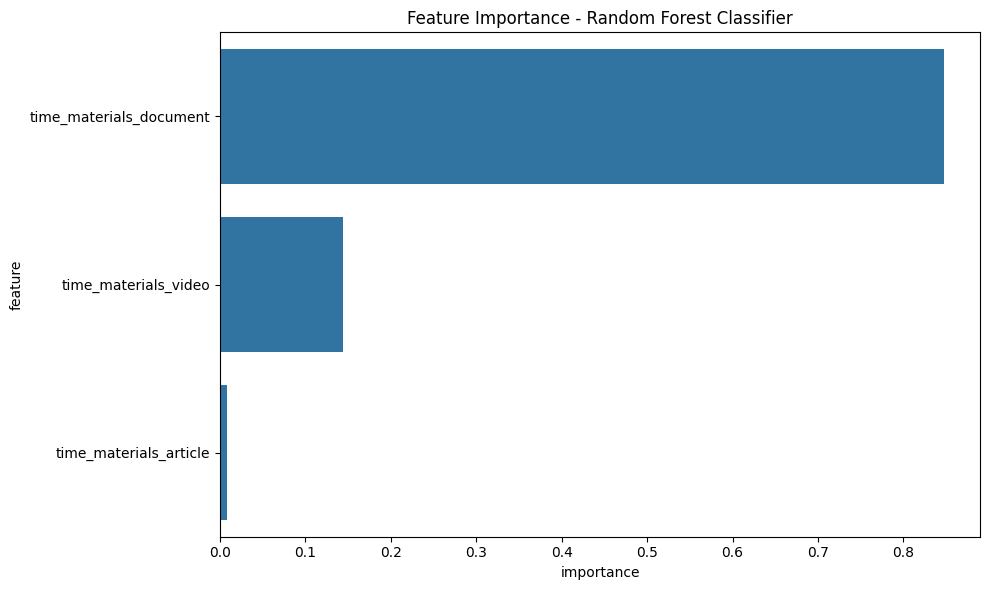

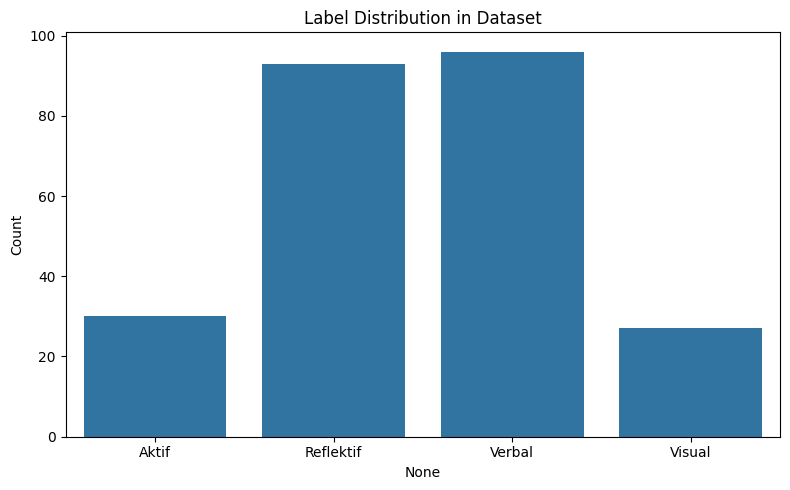

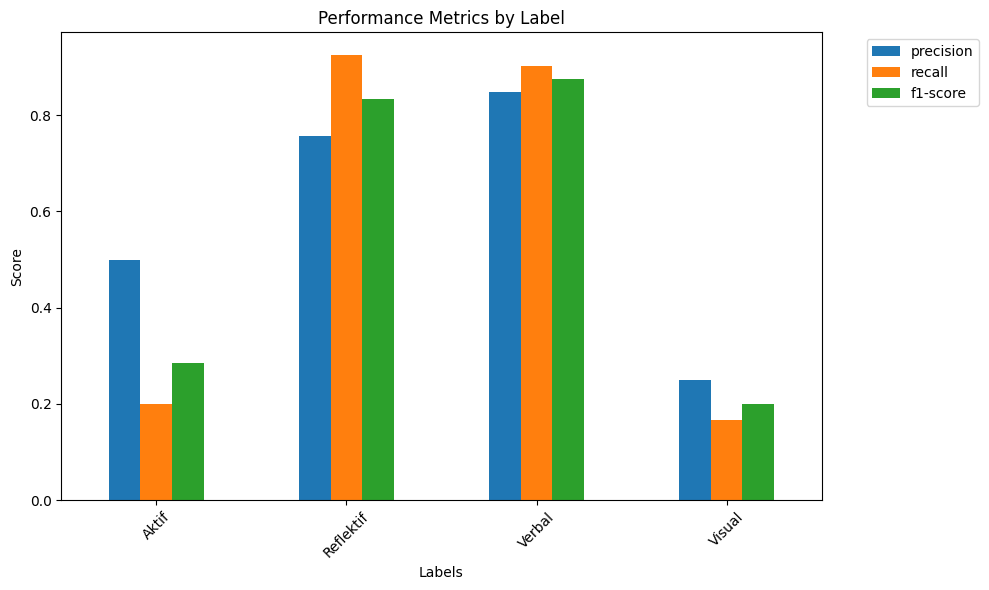

In [44]:

# 1. Feature importance visualization
feature_names = X.columns.tolist()
importances = multi_label_model.estimators_[0].feature_importances_  # Get from first estimator

plt.figure(figsize=(10, 6))
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Feature Importance - Random Forest Classifier')
plt.tight_layout()
plt.savefig(get_plot_output_path('feature_importance.png'), dpi=300, bbox_inches='tight')
plt.show()

# 2. Label distribution visualization
label_counts = pd.DataFrame(y, columns=mlb.classes_).sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution in Dataset')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(get_plot_output_path('label_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

# 3. Performance metrics visualization
report_df = pd.read_csv(get_report_output_path("classification_report.csv", "classification_results"), index_col=0)
metrics_df = report_df.loc[mlb.classes_, ['precision', 'recall', 'f1-score']]

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics by Label')
plt.ylabel('Score')
plt.xlabel('Labels')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(get_plot_output_path('performance_metrics.png'), dpi=300, bbox_inches='tight')
plt.show()